#### Importeer de juiste libraries

In [18]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LinearRegression
from random import sample
# zelf toegevoegd
from sklearn.model_selection import train_test_split

# Ochtend

#### Laad en bekijk de data

In [29]:
# data binnenhalen
data=pd.read_csv('Airlinesatisfaction1.csv')
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


#### Verwijder de kolommen waarvan de titel niet aangeeft wat de feature betekent. 

In [30]:
# haalt de kolom van unnamed weg
data = data.drop('Unnamed: 0', axis=1)

#### Zet nominale en ordinale data om in cijfers zodat je er mee kan rekenen

In [35]:
# replace vervangt de data
# inplace past het dataframe direct aan omdat zonder er een nieuwe dataframe aangemaakt wordt en het oude gelaten
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
data['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
data['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business':3}, inplace = True)

#### Plot histogrammen van alle features

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>],
       [<AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>],
       [<AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesSubplot:title={'center':'Checkin service'}>],
       [<AxesSubplot:title={'center':'Inflight service'}>,
    

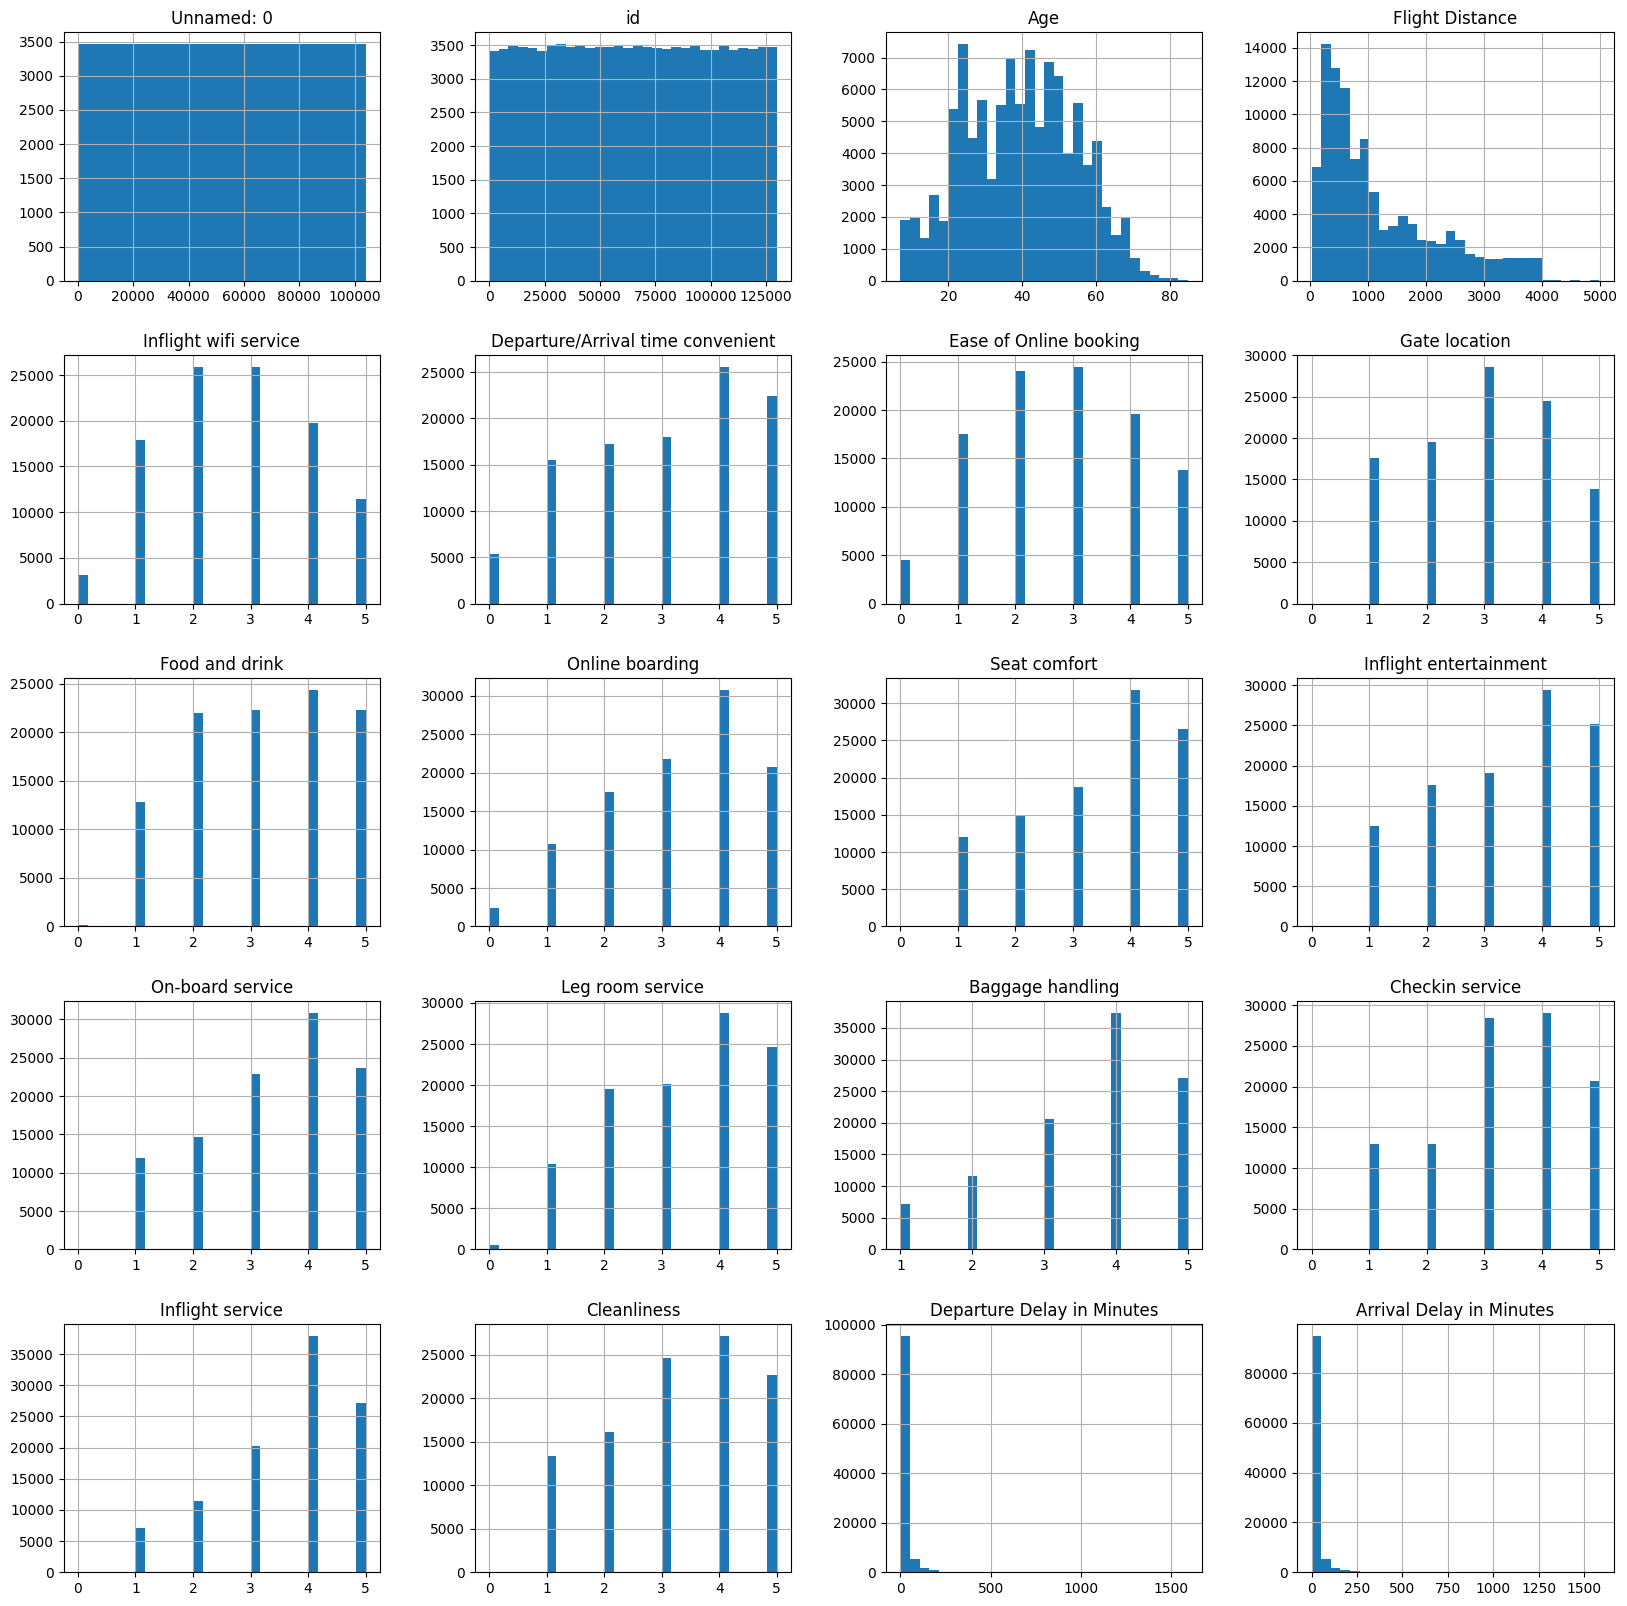

In [15]:
# bins geeft aan hoeveel balken er tonen, in hoe veel balken de data wordt verdeeld
# met figsize geef je de maat aan van het tabel
data.hist(bins=30, figsize=(20, 20))

#### Maak een boxplot van Age, Flight Distance, Departure Delay en Arrival Delay

<AxesSubplot:xlabel='Age'>

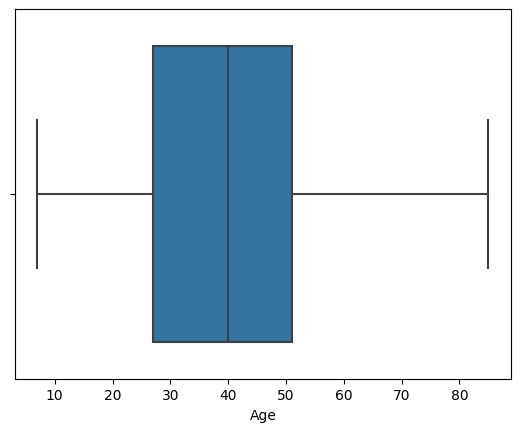

In [18]:
#Age
sns.boxplot(x=data['Age'])

<AxesSubplot:xlabel='Flight Distance'>

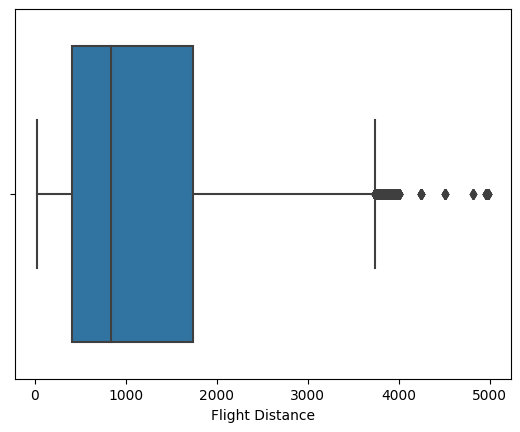

In [20]:
#Flight Distance
sns.boxplot(x=data['Flight Distance'])

<AxesSubplot:>

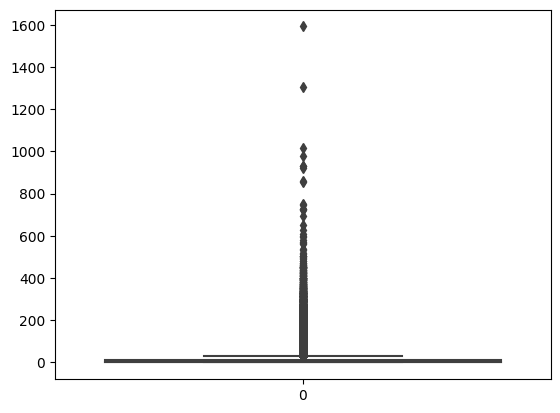

In [23]:
#Departure Delay in Minutes
sns.boxplot(x=data['Departure Delay in Minutes'])

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

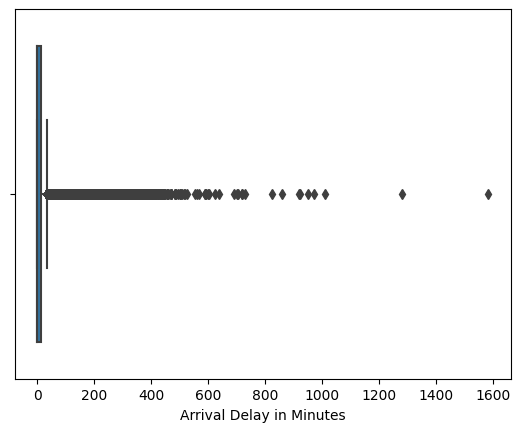

In [24]:
#Arrival Delay in Minutes
sns.boxplot(x=data['Arrival Delay in Minutes'])

#### Check of de data normaal verdeeld is met Shapiro-Wilk. Doe dit voor Age, Flight Distance, Departure Delay en Arrival Delay, 

In [57]:
#Age
stats.shapiro(data['Age'])

C:\Users\misst\aai-env\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9885779619216919, pvalue=0.0)

In [60]:
#Flight Distance
stats.shapiro(data['Flight Distance'])

ShapiroResult(statistic=0.8641177415847778, pvalue=0.0)

In [59]:
#Departure Delay in Minutes
stats.shapiro(data['Departure Delay in Minutes'])

ShapiroResult(statistic=0.4233558773994446, pvalue=0.0)

In [62]:
#Arrival Delay in Minutes
stats.shapiro(data['Arrival Delay in Minutes'])

ShapiroResult(statistic=nan, pvalue=1.0)

#### Zet de features om in z-scores (normaliseren)

In [32]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean())

0         18.0
1          6.0
2          0.0
3          9.0
4          0.0
          ... 
103899     0.0
103900     0.0
103901    14.0
103902     0.0
103903     0.0
Name: Arrival Delay in Minutes, Length: 103904, dtype: float64

In [35]:
# vervang de nan data met het gemiddelde
data.fillna(data.mean())
stats.zscore(data)

C:\Users\misst\AppData\Local\Temp\ipykernel_15368\145045249.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean())


TypeError: unsupported operand type(s) for /: 'str' and 'int'

#### Maak heatmap voor de correlaties

In [ ]:
# met annot geef je aan of je de data wil tonen in de heatmap of niet
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

#### Maak een scatter matrix voor Age, Flight Distance, Departure Delay en Arrival Delay

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Flight_Distace', ylabel='Age'>,
        <AxesSubplot:xlabel='Departure_Delay_In_Minutes', ylabel='Age'>,
        <AxesSubplot:xlabel='Arrival_Delay_In_Minutes', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Flight_Distace'>,
        <AxesSubplot:xlabel='Flight_Distace', ylabel='Flight_Distace'>,
        <AxesSubplot:xlabel='Departure_Delay_In_Minutes', ylabel='Flight_Distace'>,
        <AxesSubplot:xlabel='Arrival_Delay_In_Minutes', ylabel='Flight_Distace'>],
       [<AxesSubplot:xlabel='Age', ylabel='Departure_Delay_In_Minutes'>,
        <AxesSubplot:xlabel='Flight_Distace', ylabel='Departure_Delay_In_Minutes'>,
        <AxesSubplot:xlabel='Departure_Delay_In_Minutes', ylabel='Departure_Delay_In_Minutes'>,
        <AxesSubplot:xlabel='Arrival_Delay_In_Minutes', ylabel='Departure_Delay_In_Minutes'>],
       [<AxesSubplot:xlabel='Age', ylabel='Arrival_Delay_In_Minutes'>,
        <AxesSubplot:xlab

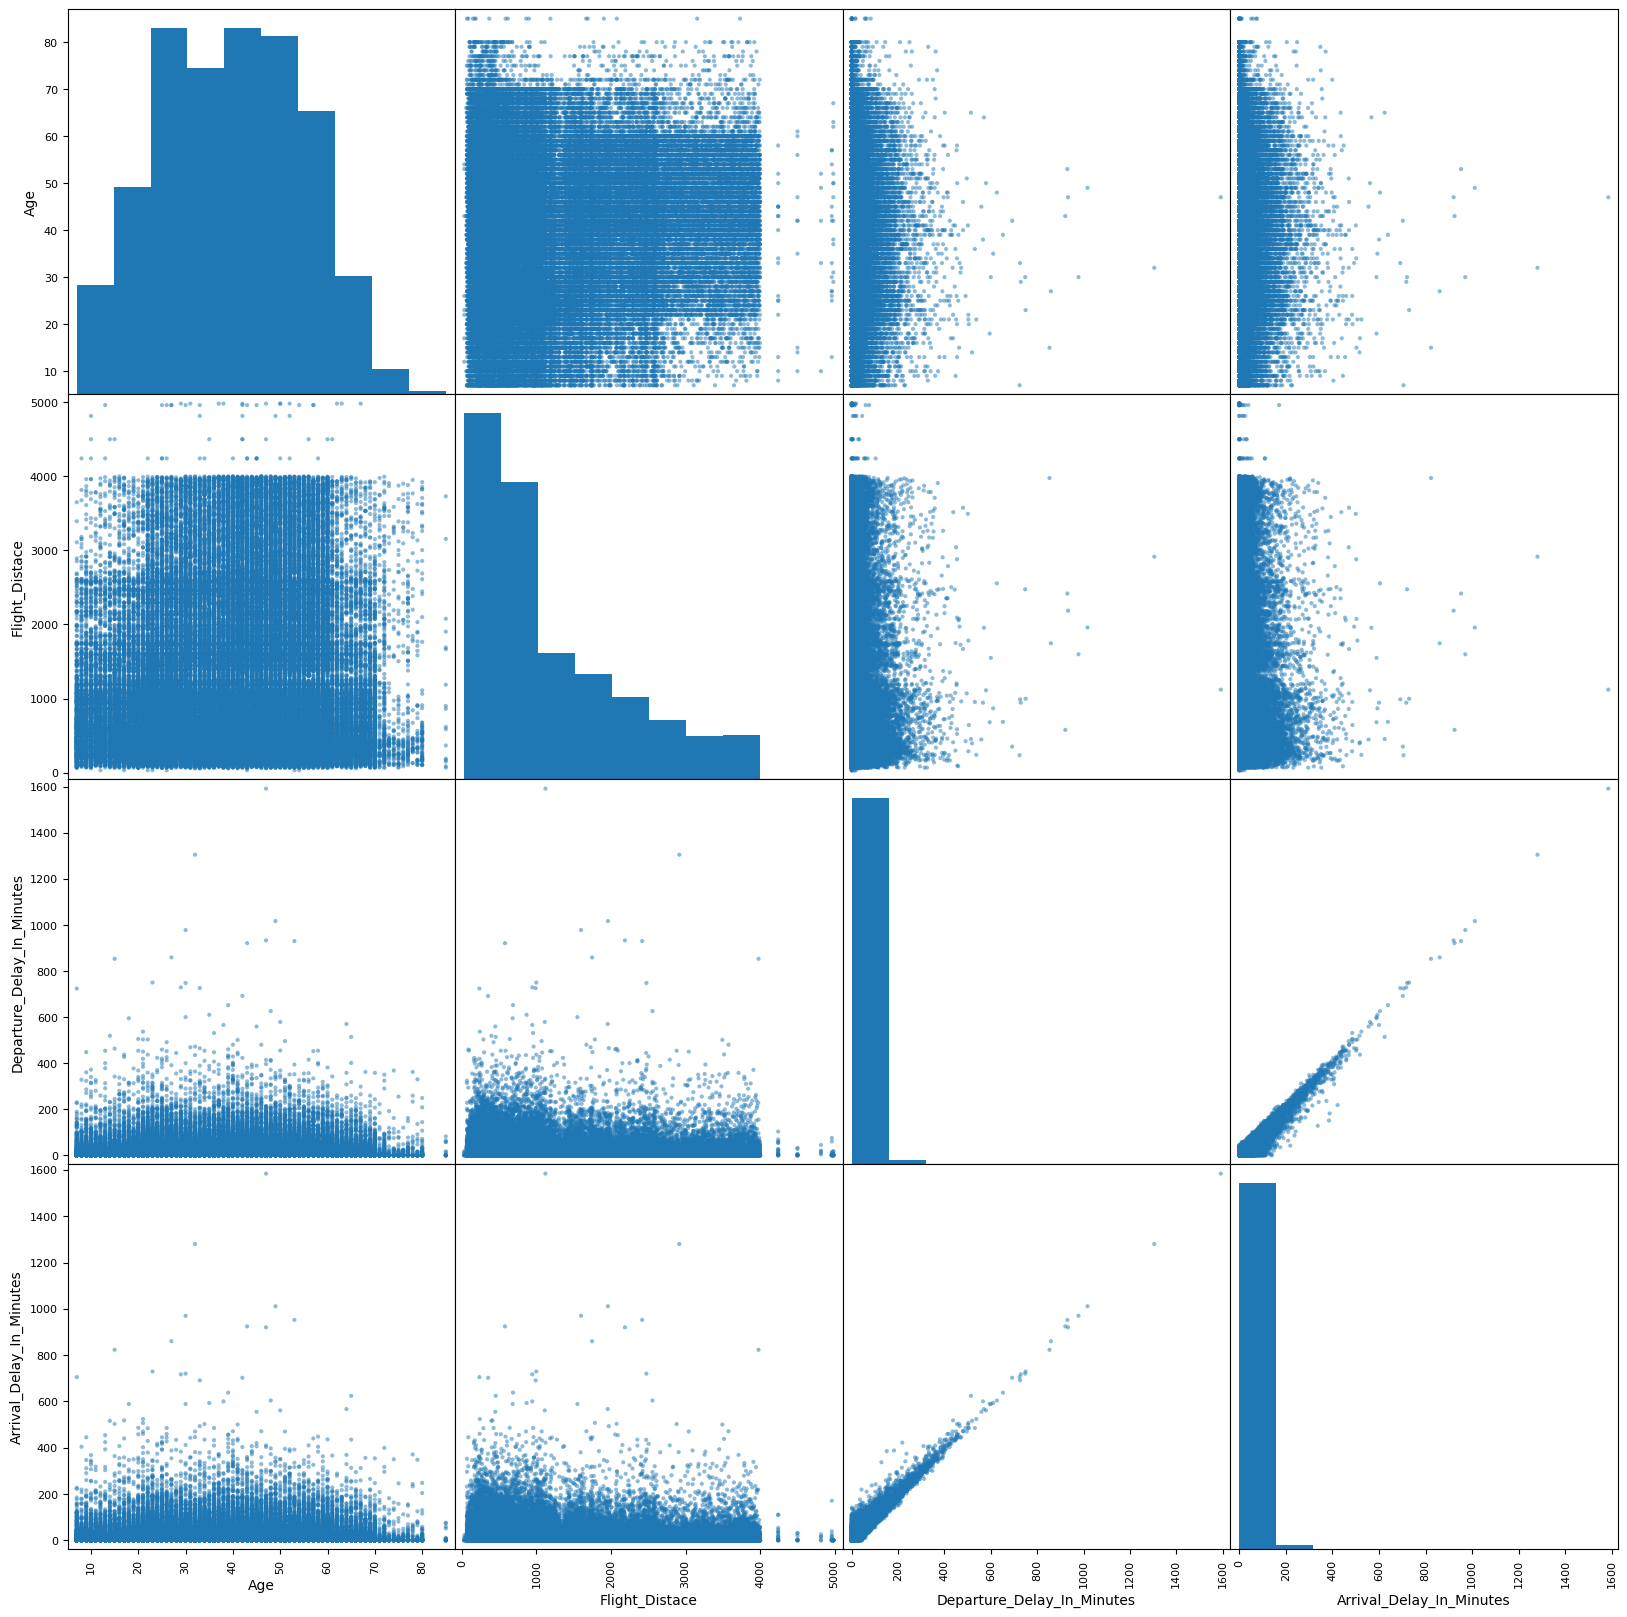

In [19]:
# nieuwe dataframe die de gevraagde kolommen assigned
data2 = pd.DataFrame().assign(Age=data['Age'], 
                             Flight_Distace=data['Flight Distance'], 
                             Departure_Delay_In_Minutes=data['Departure Delay in Minutes'], 
                             Arrival_Delay_In_Minutes=data['Arrival Delay in Minutes'])

# een scatter matrix van die nieuwe dataframe
pd.plotting.scatter_matrix(data2, figsize=(20, 20))

#### Bereken de correlatie tussen Arrival Delay en alle andere variabelen

In [27]:
corr = data.corr()
corr['Arrival Delay in Minutes']

id                                  -0.037254
Age                                 -0.012147
Flight Distance                     -0.002426
Inflight wifi service               -0.019095
Departure/Arrival time convenient   -0.000864
Ease of Online booking              -0.007984
Gate location                        0.005143
Food and drink                      -0.032524
Online boarding                     -0.021949
Seat comfort                        -0.029900
Inflight entertainment              -0.030703
On-board service                    -0.035227
Leg room service                     0.011843
Baggage handling                    -0.008542
Checkin service                     -0.020369
Inflight service                    -0.059196
Cleanliness                         -0.015774
Departure Delay in Minutes           0.965481
Arrival Delay in Minutes             1.000000
Name: Arrival Delay in Minutes, dtype: float64

# Middag

#### Correlaties tussen alle interval variabelen (geen heatmap)

In [28]:
data.corr()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.022857,0.095544,-0.021276,-0.002110,0.014163,-0.000606,0.001063,0.055477,0.052903,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.037254
Age,0.022857,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.095544,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,-0.021276,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,-0.002110,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.014163,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,-0.000606,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,0.001063,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.055477,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949
Seat comfort,0.052903,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029900


#### Voorspel arrival delay aan de hand van flight distance

In [24]:
# van x een nieuwe data frame gemaakt omdat er anders een error toont
x = pd.DataFrame().assign(Flight_Distance=data['Flight Distance'])

# de lege waardes vervangen met het gemiddelde
y = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(pred)

[15.22193811 15.15562913 15.16782506 ... 15.07876401 15.24499765
 15.22972711]


#### Voorspel arrival delay aan de hand van flight distance, leeftijd en departure delay

In [50]:
x = pd.DataFrame().assign(Flight_Distance=data['Flight Distance'], Age=data['Age'], Departure_Delay_In_Minutes=data['Departure Delay in Minutes'])
y = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(pred)

[ 0.83606834  7.5052428   0.75403211 ... 77.4309377   0.80423549
  0.78108511]
